# **Crear un archivo Shape a partir de coordenadas y datos traídos de un archivo CSV**

**Primero se deben importar todas las librerías a utilizar**

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


**Luego se importan los datos captados en campo por medio del archivo csv**

In [3]:
data_sensor = pd.read_csv("data/datos220920.csv", sep=";", encoding="utf-8")


**Se muestran los primeros 5 registros para observar que todo esté correcto**

In [4]:
data_sensor.head()

,Muestra,Temperaturasht,Humedadsht,TemperaturaBME,HumedadBME,PresionBME,AltitudBME,TempSuelo,HumedadSuelo,Fecha,Hora,Latitud,Longitud,PresicionGPS,AltitudGPS
0,3,42.03,52.30,40.83,45.94,1007.29,49.75,32.017,1159,20/09/2022,19:04:27,10.581192,-74.231979,84,40.3
1,3,42.07,51.83,40.93,45.71,1007.31,49.57,31.856,1189,20/09/2022,19:04:32,10.581195,-74.231979,84,40.7
2,3,42.24,51.60,41.02,45.39,1007.28,49.79,31.724,1226,20/09/2022,19:04:32,10.581195,-74.231979,84,40.7
3,3,42.30,49.85,41.10,44.86,1007.27,49.92,31.699,1263,20/09/2022,19:04:37,10.581195,-74.231979,84,41.1
4,3,42.33,51.08,41.18,45.03,1007.28,49.81,31.543,1296,20/09/2022,19:04:37,10.581195,-74.231979,84,41.1


In [5]:
data_sensor.describe()

,Muestra,Temperaturasht,Humedadsht,TemperaturaBME,HumedadBME,PresionBME,AltitudBME,TempSuelo,HumedadSuelo,Latitud,Longitud,PresicionGPS,AltitudGPS
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,5.506276,46.166862,38.261883,43.549791,38.256778,1007.245690,50.111213,30.804854,1196.271967,10.581134,-74.232113,80.087866,43.037238
std,2.946113,1.650734,7.423715,1.761911,4.000335,0.062425,0.522024,0.529684,293.687204,0.000050,0.000078,5.716391,2.580827
min,1.000000,42.030000,27.620000,40.830000,29.850000,1007.110000,49.220000,29.398000,494.000000,10.581036,-74.232231,69.000000,36.600000
25%,3.000000,45.115000,31.660000,42.320000,35.185000,1007.205000,49.730000,30.396500,1085.000000,10.581115,-74.232170,76.000000,41.300000
50%,6.000000,46.710000,37.500000,42.870000,38.070000,1007.270000,49.930000,30.887000,1269.000000,10.581138,-74.232124,81.000000,42.900000
75%,8.000000,47.410000,44.125000,44.870000,41.545000,1007.290000,50.455000,31.165500,1392.000000,10.581174,-74.232056,83.000000,45.200000
max,10.000000,48.580000,56.810000,47.900000,46.590000,1007.350000,51.290000,32.130000,1712.000000,10.581207,-74.231979,100.000000,48.100000


**Se crea el DataFrame con los datos captados en campo**
-----------------
Un ``GeoDataFrame`` es un objeto de Pandas que tiene una columna especial que contiene objetos de geometría. El ``GeoDataFrame`` se puede crear de varias formas, pero la forma más fácil es a partir de un ``DataFrame`` existente que contiene una o más columnas con datos de geometría.

Se asigna el nombre de las columnas, entre las cuales están los sensores y las coordenadas. Luego se asignan los datos de las columnas a las variables correspondientes, del archivo .csv

In [6]:
df = pd.DataFrame(
    {
        "Temperatura_Suelo": data_sensor["TempSuelo"],
        "latitud": data_sensor["Latitud"],
        "longitud": data_sensor["Longitud"],
    }
)


Se utiliza ``points_from_xy()`` para transformar la latitud y la longitud dentro de un punto a Shape.
Con ``GeoDataFrame()`` se crea el GeoDataFrame con los datos captados en campo a partir de la geometría de los puntos Shape.

In [7]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitud, df.latitud)
)


Se imprimen los primeros 5 registros para observar que todo esté correcto.

In [8]:
print(gdf.head())

   Temperatura_Suelo    latitud   longitud                    geometry
0             32.017  10.581192 -74.231979  POINT (-74.23198 10.58119)
1             31.856  10.581195 -74.231979  POINT (-74.23198 10.58119)
2             31.724  10.581195 -74.231979  POINT (-74.23198 10.58119)
3             31.699  10.581195 -74.231979  POINT (-74.23198 10.58119)
4             31.543  10.581195 -74.231979  POINT (-74.23198 10.58119)


**Integración con el Sistema de Referencia de Coordenadas (SRC) WGS84 EPSG:4326**
-----------------
Ya el archivo ``dgf`` es un GeoDataFrame, pero, no tiene un sistema de referencia de coordenadas (SRC) asignado. El cual es necesario, ya que, si se desa proyectar dentro de un mapa, esta proyección es utilizada para cargar la información. Para asignar un SRC, se utiliza ``set_crs()``.

In [9]:
gdf = geopandas.GeoDataFrame(df, geometry='geometry')
gdf = gdf.set_crs("EPSG:4326")
print(gdf.crs)


EPSG:4326


<AxesSubplot: >

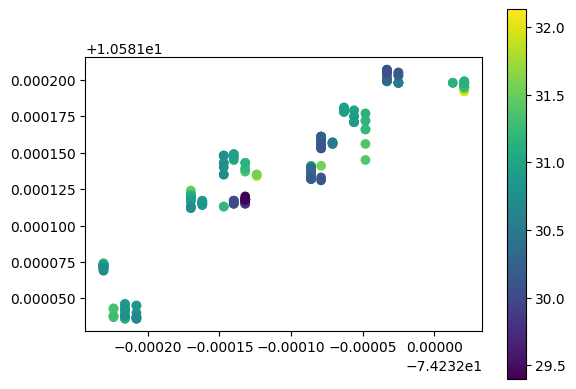

In [10]:
gdf = gdf.set_geometry("geometry")
gdf.plot("Temperatura_Suelo", legend=True)

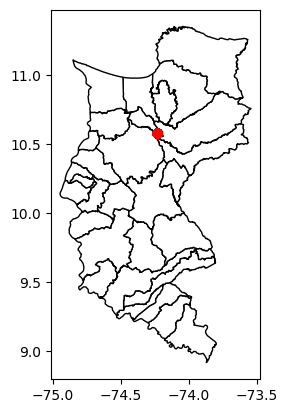

In [11]:
# Se carga el mapa de Magdalena
magdalena = "data/Magdalena/Magdalena_municipios.shp"

# Se lee el archvio
mapa_magdalena = geopandas.read_file(magdalena)

mapa_magdalena = mapa_magdalena.set_geometry("geometry")
mapa_magdalena = mapa_magdalena.to_crs("EPSG:4326")

ax = mapa_magdalena.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [12]:
gdf.explore("Temperatura_Suelo", legend=True)

# **Exportar el shape creado a partir de los datos captados en campo**

In [14]:
gdf.to_file("data/salida_campo.shp")

C:\Users\Migue Polo\AppData\Local\Temp\ipykernel_18344\954636771.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("data/salida_campo.shp")
